## Data wrangling - WeRateDogs


## Table of Contents
- [Introduction](#introduction)
- [Part 1 - Gathering data](#gatheringdata)
- [Part 2 - Assessing data](#assessingdata)
 + [Part 2-1 - Qality](#quality) 
 + [Part 2-2 - Tidiness](#tidiness)
- [Part 3 - Cleaning data](#cleaningdata)
- [Part 4 - Insights and Visualization](#insightsandvisualization)
 + [Part 4-1 - First Insight](#firstinsight)
 + [Part 4-2 - Second Insight](#secondinsight)
 + [Part 4-3 - Third Insight](#thirdinsight)


<a id='introduction'></a>
### Introduction

The purpose of this project is use what I learned in data wrangling lesson from Udacity Data Analysis Nanodegree program. The dataset which will be wrangled is the tweets archive of Twitter user @dog_rates, also known as WeRateDogs. <br/>

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. <br/>

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is amazing, but it only contains very basic tweet information that comes in JSON format. So I need to gather, asses and clean the Twitter data for a worthy analysis and visualization.


### Key Points

- We only want original ratings **(no retweets) that have images**. Though there are 5000+ tweets in the dataset, **not all are dog ratings and some are retweets**.

- **We do not need to gather the tweets beyond August 1st, 2017**. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

- Fully assessing and cleaning the entire dataset requires exceptional effort so only a subset of its issues **(eight (8) quality issues and two (2) tidiness issues at minimum) need to be assessed and cleaned.**

- Cleaning includes **merging individual pieces of data** according to the rules of tidy data.

- The fact that the rating numerators are greater than the denominators **does not need to be cleaned**. This unique rating system is a big part of the popularity of WeRateDogs.

<a id='gatheringdata'></a>
### Part 1 - Gathering data

**1. Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

**2. Tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

**3. Twitter API & JSON**: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

###### 1. Twitter Archive File:

In [1]:
##Import all the necessery libraries will be used in this project
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Load CSV File
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
##Viweing the data frame and ensure that our Dataframe is not beyond the first of August in 2017
twitter_archive_df.sort_values('timestamp')
twitter_archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
##Show detailed info about the dataframe
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

###### 2. Tweet image predictions:

In [5]:
##Download the URL programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

##Get the content of the url into response variable
response = requests.get(url)

##Write the content of the response into file 'image-predictions.tsv'
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [6]:
##Load TSV File
image_predictions_df = pd.read_csv('image-predictions.tsv',sep = '\t')

In [7]:
##Viweing the data frame
image_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
##Showing detailed info about the data frame
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


###### 3. Twitter API & JSON:

In [9]:
##Set the method of querying Twitter API
CONSUMER_KEY = "27ikX3e9zil0cWEcUdObvp7Yn"
CONSUMER_SECRET = "Rw1I9Iv255lVrpZ4zGPR299UmAabq91Msmk0jpcAS29QYmzPMy"
OAUTH_TOKEN = "1067652094293917696-ujQyEeNb8LdYPqSiKsuFiHMIb5IiMQ"
OAUTH_TOKEN_SECRET = "xT1JTybB7whgafN2Gntle0CWLivKR2Jebea9O75WK9cOq"

auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [10]:
##Fetch tweets from the twitter API and store them in the list 'all_tweets'
all_tweets = []
##Tweets that can't be found are saved in the list 'not_found_tweets'
not_found_tweets = []
##Loop on the whole dataframe and fill in the two mentioned lists with proper values
for tweet_id in twitter_archive_df['tweet_id']:   
    try:
        all_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        not_found_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 705
Rate limit reached. Sleeping for: 703


In [11]:
##Test the list and check the number of elements in it 
print(len(all_tweets))

2337


In [12]:
## testing the list and check the number of elements in it
print(len(not_found_tweets))

19


In [13]:
##Separating each JSON block from the list 'all_tweets' and store them in list 'json_tweet_dict'
json_tweet_dict = []

for json_block in all_tweets:
    json_tweet_dict.append(json_block)

In [14]:
##Loop on each block and write it in a new-made .txt file called 'tweet_json.txt'
with open('json_tweets.txt', 'w') as file:
    file.write(json.dumps(json_tweet_dict, indent = 4))

In [15]:
##Select specific information from JSON dictionaries in a txt file 
##and put it in a dataframe called json_tweets
selected_info = []
with open('json_tweets.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for dicti in all_data:
        tweet_id = dicti['id']
        favorite_count = dicti['favorite_count']
        retweet_count = dicti['retweet_count']
        whole_source = dicti['source']
        source = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        text = dicti['text']
        retweeted_status = dicti['retweeted_status'] = dicti.get('retweeted_status', 'Tweet')
        if retweeted_status == 'Tweet':
            short_url = text[text.find('https'):]
        else:
            retweeted_status = 'Retweet'
            short_url = 'Retweet'
        
        selected_info.append({'tweet_id': str(tweet_id),'favorite_count': int(favorite_count),'retweet_count': int(retweet_count),'url': short_url,
                             'source': source, 'retweeted_status': retweeted_status, })

In [16]:
##Build the json_tweets dataframe
json_tweets_df = pd.DataFrame(selected_info, columns = ['tweet_id', 'favorite_count','retweet_count','source',
                                                    'retweeted_status', 'url'])


##Create new file called 'json_tweets_cleaned.csv' with all cleaned json blocks
json_tweets_df.to_csv('json_tweets_cleaned.txt', encoding = 'utf-8', index=False)

In [17]:
##Showing the data frame
json_tweets_df.sample(10)

,tweet_id,favorite_count,retweet_count,source,retweeted_status,url
244,844580511645339650,16973,3281,Twitter for iPhone,Tweet,https://t.co/FatDY8E0GO
1191,715696743237730304,4025,1349,Twitter for iPhone,Tweet,https://t.co/cYPHuJYTjC
1613,684481074559381504,4025,1230,Twitter for iPhone,Tweet,https://t.co/nBtDeZ4yAb
2321,666099513787052032,149,64,Twitter for iPhone,Tweet,https://t.co/Ri4nMTLq5C
1954,673213039743795200,2259,856,Twitter for iPhone,Tweet,https://t.co/CbvCUE6PFI
191,854120357044912130,32278,7650,Twitter for iPhone,Tweet,https://t.co/lXqbJhAYAk
1854,675145476954566656,2166,929,Twitter for iPhone,Tweet,https://t.co/YDgstgIDGs
882,758828659922702336,11669,4073,Twitter for iPhone,Tweet,https://t.co/9T2h14yn4Q
1264,708738143638450176,2833,853,Twitter for iPhone,Tweet,https://t.co/wsCB6LFNxD
943,751132876104687617,5279,1379,Twitter for iPhone,Tweet,https://t.co/yToDwVXEpA


In [18]:
## Viweing detailed info about the data frame
json_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 6 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(2), object(4)
memory usage: 109.6+ KB


<a id='assessingdata'></a>
### Part 2 - Assessing data

#### Visual Assessment:
In this assessment phase, we use our visual ability to assess the showed data and if we can easily identify issue related to quality or tidiness of the data by eye sights.

In [19]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [20]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
json_tweets_df

,tweet_id,favorite_count,retweet_count,source,retweeted_status,url
0,892420643555336193,37553,8189,Twitter for iPhone,Tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32281,6058,Twitter for iPhone,Tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24318,4008,Twitter for iPhone,Tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,40902,8345,Twitter for iPhone,Tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39097,9038,Twitter for iPhone,Tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,19665,3002,Twitter for iPhone,Tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11491,1985,Twitter for iPhone,Tweet,https://t.co/MV01Q820LT
7,890729181411237888,63358,18193,Twitter for iPhone,Tweet,https://t.co/hrcFOGi12V
8,890609185150312448,27029,4120,Twitter for iPhone,Tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,30974,7112,Twitter for iPhone,Tweet,https://t.co/l3TSS3o2M0


#### Programmatic Assessment:
In this assessment phase, we are more concern about using the programmatic approach and use the powerful libraries of python like pandas and numpy to identify issues to be cleaned.

In [22]:
##Show detailed info about the twitter_archive dataframe
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
##View descriptive statistics of twitter_archive dataframe
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
##Get the number of duplicates in respect of values in twitter_id column
sum(twitter_archive_df['tweet_id'].duplicated())

0

In [25]:
##Get the number of numerators with counts of each
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
twitter_archive_df['name'].value_counts()

None           745
a               55
Charlie         12
Oliver          11
Lucy            11
Cooper          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
the              8
Sadie            8
Bailey           7
Toby             7
Daisy            7
an               7
Buddy            7
Rusty            6
Dave             6
Bella            6
Jax              6
Koda             6
Milo             6
Oscar            6
Scout            6
Stanley          6
Jack             6
Leo              6
Sammy            5
              ... 
Kenzie           1
Charl            1
Naphaniel        1
Kane             1
old              1
Major            1
Milky            1
Champ            1
Tiger            1
Gerbald          1
Beebop           1
Brockly          1
Bobb             1
Wafer            1
Sky              1
Rascal           1
Karl             1
infuriating      1
Ralf             1
Ferg             1
Rodman           1
Shadoe      

In [27]:
##Get the width of columns in dataframes
pd.options.display.max_colwidth

50

In [28]:
##Maximuize the display width of columns in dataframes
pd.options.display.max_colwidth = 500

In [29]:
##Check the suspected values of rating_numerator to identify if this value is mentioned exactly in the text of the tweet(as Rating) or not.

##By checking the url mentioned in the text, i found that the mentioned rating is not for one puppy, it's for 17 dogs
##in the SAME picture.That's why the rating is 204/170
twitter_archive_df[twitter_archive_df.rating_numerator ==204]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


In [30]:
##By reading the text mentioned below, i found that this is a retweet for explainging
##the rating system used here in Weratedogs Account.
twitter_archive_df[twitter_archive_df.rating_numerator ==960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [31]:
##By checking the url mentioned in the text, i found that the mentioned rating is not for one puppy, it's for 14 dogs
##in the SAME picture. That's why the rating is 143/130
twitter_archive_df[twitter_archive_df.rating_numerator ==143]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143,130,None,None,None,None,None


In [32]:
###This tweet has no picture, so it should be ignored in the cleaning steps due to the instructions.
twitter_archive_df[twitter_archive_df.rating_numerator ==666]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [33]:
##No probelm to be mentioned in this tweet.
twitter_archive_df[twitter_archive_df.rating_numerator ==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [34]:
##Getting the number of denominator with counts of each
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [35]:
##Check the suspected values of rating_denominator to identify if this value is mentioned exactly in the text of the tweet(as Rating) or not.

##By checking the url mentioned in the text, i found that the mentioned rating is not correct.
##For example, the first record, the mentioned rating is not 9/11, but it's 14/10. So the denominator should be corrected to be 10
##For those three records, the denominator's value should be corrected
twitter_archive_df[twitter_archive_df.rating_denominator ==11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None


In [36]:
##By checking the url mentioned in the text, i found that the mentioned rating is not 1/2, but it's 9/10. 
##So the denominator should be corrected to be 10
twitter_archive_df[twitter_archive_df.rating_denominator ==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [37]:
##By checking the url mentioned in the text, i found that this tweet is just for explaining
##how the rating system in Weratedogs works.
twitter_archive_df[twitter_archive_df.rating_denominator ==16]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None


In [38]:
##By checking the url mentioned in the text, i found that this tweet has no rating in the correct format, so this record should
##be deleted in the cleaning phase.
twitter_archive_df[twitter_archive_df.rating_denominator ==15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [39]:
##By checking the url mentioned in the text, i found that this tweet has no rating in the correct format, so this record should
##be deleted in the cleaning phase.
twitter_archive_df[twitter_archive_df.rating_denominator ==7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [40]:
##By checking the url mentioned in the text, no problem to be mentioned here as 
##the rating is correctly populated through the record
twitter_archive_df[twitter_archive_df.rating_denominator ==90]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None


In [41]:
##Searching for fractional Numerators which will be 'not showed' due to wrong format of cells in the populated data excel sheet
##If found, it should be cleaned properly and correct the rating values either for Numerators/ Denominators
twitter_archive_df[twitter_archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [42]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
211,670003130994700288,https://pbs.twimg.com/media/CUxUSuaW4AAdQzv.jpg,1,beagle,0.375313,True,Saint_Bernard,0.174911,True,English_foxhound,0.115888,True
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
776,689661964914655233,https://pbs.twimg.com/media/CZIr5gFUsAAvnif.jpg,1,Italian_greyhound,0.322818,True,whippet,0.246966,True,Chihuahua,0.122541,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False
1536,790581949425475584,https://pbs.twimg.com/media/Cvi2FiKWgAAif1u.jpg,2,refrigerator,0.998886,False,malinois,0.000153,True,kelpie,0.000131,True
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True
1133,728409960103686147,https://pbs.twimg.com/media/ChvU_DwWMAArx5L.jpg,1,Siamese_cat,0.478278,False,Saint_Bernard,0.094246,True,king_penguin,0.082157,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
124,668237644992782336,https://pbs.twimg.com/media/CUYOl0kW4AAVe_p.jpg,1,chow,0.809320,True,minivan,0.071311,False,Pekinese,0.037870,True
1982,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True


In [43]:
##View descriptive statistics of image_predictions dataframe
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [44]:
##View info about image_predictions dataframe
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
##Search for many tweets refering to same puppy/ dogs
sum(image_predictions_df['jpg_url'].duplicated())

66

In [46]:
##Get the exct duplicate records.The expected number is 132 because of 66*2
df_duplicates = image_predictions_df[image_predictions_df.jpg_url.duplicated(keep=False)]

In [47]:
df_duplicates.sort_values('jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [48]:
json_tweets_df.source.value_counts()

Twitter for iPhone     2203
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [49]:
json_tweets_df.retweeted_status.value_counts()

Tweet      2171
Retweet     166
Name: retweeted_status, dtype: int64

## Assessing Conclusion

<a id='quality'></a>
### Quality Issues:
Based on the concepts of good quality data which are: Completeness, validity, accuracy, consistency. This dataset should be cleaned from the mentioned below issues.


#### Twitter_Archvie_df
1- Delete all tweets that have no images or actual ratings.<br/>
2- Correct the records with value 'None' to be null.<br/>
3- Correct the rating system due to fractional numerators/denominators.<br/>
4- Delete columns which we will not use.<br/>
6- Correct the numerators/denominators due to pictures which have more than one puppy and the denominator is not 10 due to       unknown conditions. <br/>
7- Separate the full timestamp provided into three columns (Day-Month-Year) which will be helpful for other teams to query through this dataset.<br/>


#### Image_Predictions_df
1- Delete all duplicated **jpg_url** tweets.<br/>
2- Delete columns which we will not use.<br/>

#### Tweet_json
1- Delete all tweets except for 'Tweet'.<br/>

<a id='tidiness'></a>
### Tidiness Issues:
Issues here are more related to the structure of the data and the used datatypes, and how to make the whole dataset easy to use.

1- Change the datatype of tweet_id column in json_tweets table to **int64** instead of **object** in order to be able to merge the three tables together. <br/>
2- Melt those columns (doggo, floofer, pupper and puppo) into new columns **dog** and **dogs_blood** columns. **(This issue will be handeled under the table's section.)**<br/>
3- Concatenate all tables together into one dataframe.<br />

<a id='cleaningdata'></a>
## Cleaning Data

In [50]:
##First of all, creating a backup dataframe of each dataframe we have

twitter_archive_df_clean = twitter_archive_df.copy()
image_prediction_df_clean = image_predictions_df.copy()
json_tweets_df_clean = json_tweets_df.copy()

### Quality Issues:

#### Twitter_Archive_df issues:

#### 1- Delete all tweets that have no images or retweets.

##### Definition 
There are 181 values in retweeted_status_id or the tweets which not having actual rating. Delete the retweets.

##### The Code

In [51]:
##Delete retweets by only selecting the Nan records
twitter_archive_df_clean = twitter_archive_df_clean[pd.isnull(twitter_archive_df_clean['retweeted_status_user_id'])]

twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 832088576586297345]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 810984652412424192]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 682808988178739200]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 835246439529840640]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 686035780142297088]

##### The Test

In [52]:
##Testing the cleaning code
print(sum(twitter_archive_df_clean.retweeted_status_user_id.value_counts()))


twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 832088576586297345]

0


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [53]:
twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [54]:
twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 682808988178739200]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [55]:
twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [56]:
twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 686035780142297088]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 2- Correct the records with name 'None' to be 'NaN'.

#### The Definition

Through the assessment phase of this table, i noticed that there is 745 records have 'None' value in the name column. So, we should correct those records to be null.

#### The Code

In [57]:
##Change the value of name of this specific records
twitter_archive_df_clean['name'].replace('None',np.nan,inplace = True)

#### The Test

In [58]:
twitter_archive_df_clean.name.value_counts()

a               55
Charlie         11
Lucy            11
Oliver          10
Cooper          10
Tucker           9
Penny            9
the              8
Sadie            8
Winston          8
Lola             8
Daisy            7
Toby             7
Oscar            6
Stanley          6
Bailey           6
Bella            6
Jax              6
an               6
Koda             6
Bo               6
Buddy            5
Scout            5
Chester          5
Louis            5
Milo             5
Rusty            5
Leo              5
Bentley          5
Dave             5
                ..
Howie            1
Lulu             1
Loomis           1
Stubert          1
Mark             1
Eriq             1
Snoop            1
Genevieve        1
Sailer           1
Hurley           1
Buddah           1
Clarkus          1
Monty            1
Pipsy            1
Arlo             1
Tebow            1
Brandi           1
Maxwell          1
Darby            1
Benny            1
Pubert           1
Storkson    

#### 3- Correct the rating system due to fractional numerators/denominators.

##### Definition 
I found that there are 6 records have fractional rating in the body of the text. However, the Numerators/Denominator values are not correct.

##### The Code

In [59]:
##Convert the datatype of the columns 'rating_numerator', 'rating_denominator' to be float to accept float numbers.
twitter_archive_df_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_df_clean[['rating_numerator',
                                                                                                 'rating_denominator']].astype(float)

In [60]:
##Fix the values of rating_numerator and rating_dominator manually, becuase those records are just caused by unknown reasons.
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75

##### The Test

In [61]:
with pd.option_context('max_colwidth', 500):
    display(twitter_archive_df_clean[twitter_archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator','name']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator,name
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0,Bella
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0,Logan
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0,Sophie
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0,NaN
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0,NaN


#### 4- Delete columns which will not be helpful in our analysis.

##### Definition 
Delete all columns which will not be helpful in our analysis.

#### The Code

In [62]:
##Get column names of twitter_archive_clean
print(list(twitter_archive_df_clean))

##Delete not needed columns
twitter_archive_df_clean = twitter_archive_df_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


#### The Test

In [63]:
print(list(twitter_archive_df_clean))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


#### 5- Melt those columns (doggo, floofer, pupper and puppo) into new columns dog and dog_type columns 

##### Definition 
Melt the doggo, floofer, pupper and puppo columns to dog and dogs_blood columns. Then drop dog column. Sort by dogs_blood in order to then drop duplicated based on tweet_id except for the last occurrence.

#### The Code

In [64]:
##First, Melt the doggo, floofer, pupper and puppo columns to dog and dogs_blood columns
twitter_archive_df_clean = pd.melt(twitter_archive_df_clean, id_vars=['tweet_id', 'timestamp','text','rating_numerator',
                                                                'rating_denominator','name'],
                               var_name='dog', value_name='dogs_blood')

In [65]:
##Second, Drop dog column
twitter_archive_df_clean = twitter_archive_df_clean.drop('dog', 1)

In [66]:
##Third, Sort by dogs_blood column and then drop duplicated based on tweet_id except the last occurrence
twitter_archive_df_clean = twitter_archive_df_clean.sort_values('dogs_blood').drop_duplicates(subset='tweet_id',keep='last')

#### The Test

In [67]:
twitter_archive_df_clean['dogs_blood'].value_counts()

None       1826
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_blood, dtype: int64

#### 6- Correct the numerators/denominators due to pictures which have more than one puppy and the denominator is not 10 due to unknown conditions.

#### The Definition

Firstly, There are 5 tweets with denominator not equal to 10. Therefore, we need to update these records manually.

Secondly, These tweets with denominator not equal to 10 are multiple dogs. **For example, tweet_id 697463031882764288** has numerator and denominators 44/40 because there are 4 dogs in the picture. So , i decided to create new column called 'rating', it's value will equal to 10*numerator / denominator

#### The Code

In [68]:
## First, updating the 5 records which have not correct denominator
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

In [69]:
## Secondly, Create a new column called rating with float type
twitter_archive_df_clean['rating'] = 10 * twitter_archive_df_clean['rating_numerator'] / twitter_archive_df_clean['rating_denominator'].astype(float)


#### The Test

In [70]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10][['tweet_id','text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3421,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3622,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3621,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3242,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3217,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3262,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3339,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3765,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
3829,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0
2531,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0


#### 6- Separate the full timestamp provided into three columns (Day- Month - Year) which will be helpful for other teams to query throuh this dataset.

#### Definition

Firstly, convert timestamp column to datetime datatype. <br/>
Extract year, month and day to new columns. Finally drop timestamp column.

#### The Code

In [71]:
##Convert the datatype of the column to datetime
twitter_archive_df_clean['timestamp'] = pd.to_datetime(twitter_archive_df_clean['timestamp'])

#Extract year, month and day to new columns
twitter_archive_df_clean['year'] = twitter_archive_df_clean['timestamp'].dt.year
twitter_archive_df_clean['month'] = twitter_archive_df_clean['timestamp'].dt.month
twitter_archive_df_clean['day'] = twitter_archive_df_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter_archive_df_clean = twitter_archive_df_clean.drop('timestamp', 1)

##### The Test

In [72]:
list(twitter_archive_df_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_blood',
 'rating',
 'year',
 'month',
 'day']

#### Image_Predictions_df:

##### 1- Delete all duplicated jpg_url tweets.

##### Definition 
Delete all the duplicated jpg_url tweets which are 66 records.

##### The Code 

In [73]:
##Delete duplicated jpg_url
image_prediction_df_clean = image_prediction_df_clean.drop_duplicates(subset=['jpg_url'], keep='last')

##### The Test

In [74]:
sum(image_prediction_df_clean['jpg_url'].duplicated())

0

#### 2- Delete columns which will not be helpful in our analysis.

#### Definition
Delete columns which will not be helpful in our analysis.

#### The Code

In [75]:
print(list(image_prediction_df_clean))

image_prediction_df_clean = image_prediction_df_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


#### The Test

In [76]:
print(list(image_prediction_df_clean))

['tweet_id', 'jpg_url']


#### Twiiter_json:

##### 1- Delete all tweets except for 'Tweet'. 

#### Definition

Deleteting all tweets except for the 'Tweet' records.

#### The Code

In [77]:
json_tweets_df_clean = json_tweets_df_clean[json_tweets_df_clean['retweeted_status'] == 'Tweet']

#### The Test

In [78]:
json_tweets_df_clean['retweeted_status'].value_counts()

Tweet    2171
Name: retweeted_status, dtype: int64

### Tidiness Issues:

#### 1- Change tweet_id to type int64 in order to merge with the other 2 tables.

#### Definition
Change tweet_id to type int64 in order to merge with the other 2 tables

#### The Code

In [79]:
##Change tweet_id from str to int
json_tweets_df_clean['tweet_id'] = json_tweets_df_clean['tweet_id'].astype(int)

#### The Test

In [80]:
json_tweets_df_clean['tweet_id'].dtypes

dtype('int64')

### 3- Concatenate all tables together into one dataset

#### Definition
All tables should be part of one dataset

#### The Code

In [81]:
##Join all tables on Left Join using the Tweet_ID column
twitter_df = pd.merge(twitter_archive_df_clean,image_prediction_df_clean, how = 'left', on = ['tweet_id'])

In [82]:
# Only keeping rows that have pictures (jpg_url)
twitter_df = twitter_df[twitter_df['jpg_url'].notnull()]

In [83]:
##Create a new dataframe that merge full_twitter_df and tweet_json_df_clean
full_twitter_df = pd.merge(twitter_df, json_tweets_df_clean, how = 'left', on = ['tweet_id'])

#### The Test

In [84]:
twitter_df.sample()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_blood,rating,year,month,day,jpg_url
1173,817536400337801217,"Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",12.0,10.0,Eugene,None,12.0,2017,1,7,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg


In [85]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 0 to 2169
Data columns (total 11 columns):
tweet_id              1927 non-null int64
text                  1927 non-null object
rating_numerator      1927 non-null float64
rating_denominator    1927 non-null float64
name                  1398 non-null object
dogs_blood            1927 non-null object
rating                1927 non-null float64
year                  1927 non-null int64
month                 1927 non-null int64
day                   1927 non-null int64
jpg_url               1927 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 180.7+ KB


In [86]:
full_twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 0 to 1926
Data columns (total 16 columns):
tweet_id              1927 non-null int64
text                  1927 non-null object
rating_numerator      1927 non-null float64
rating_denominator    1927 non-null float64
name                  1398 non-null object
dogs_blood            1927 non-null object
rating                1927 non-null float64
year                  1927 non-null int64
month                 1927 non-null int64
day                   1927 non-null int64
jpg_url               1927 non-null object
favorite_count        1923 non-null float64
retweet_count         1923 non-null float64
source                1923 non-null object
retweeted_status      1923 non-null object
url                   1923 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 255.9+ KB


<a id='storingandvisualizing'></a>
### Storing, Analyzing, and Visualizing Data

In [87]:
##Store the clean DataFrame in a CSV file
full_twitter_df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

##### The First Insight:

Most common device used to post dogs' Tweets.

In [88]:
##Create new dataframe of counts of each dog type
device_type_count_df = full_twitter_df.groupby('source').count()
device_type_count_df['tweet_id']

source
TweetDeck               10
Twitter Web Client      26
Twitter for iPhone    1887
Name: tweet_id, dtype: int64

In [98]:
##Create new dataframe with different sources and their counts 
plotted_df = pd.DataFrame()
plotted_df= full_twitter_df.groupby("source")["tweet_id"].count().reset_index(name="count")

In [99]:
##Drop Nan Values
plotted_df = plotted_df[pd.notnull(plotted_df['source'])]

df_dog_type['dogs_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the most rated dog types')
plt.xlabel('The Counts')
plt.ylabel('Type of the dog')
fig = plt.gcf() 
fig.savefig('Second_Insight_plot.png',bbox_inches='tight');


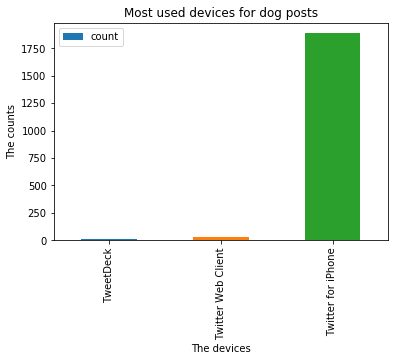

In [131]:
plotted_df.plot(x="source", y="count", kind="bar")

plt.title('Most used devices for dog posts')
plt.xlabel('The devices')
plt.ylabel('The counts')
fig = plt.gcf() 
fig.savefig('First_Insight_plot.png',bbox_inches='tight');

##### The Second Insight:

Comparison of Retweets vs Favourites(likes)

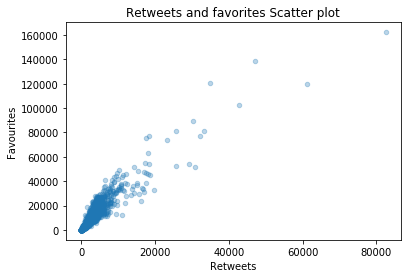

In [127]:
full_twitter_df.plot(kind='scatter',x='retweet_count',y='favorite_count', alpha = 0.3)
plt.xlabel('Retweets')
plt.ylabel('Favourites')
plt.title('Retweets and favorites Scatter plot')
fig = plt.gcf() 
fig.savefig('Second_Insight_plot.png');

#### The Third Insight:

The highest ratings not always with the highest retweets

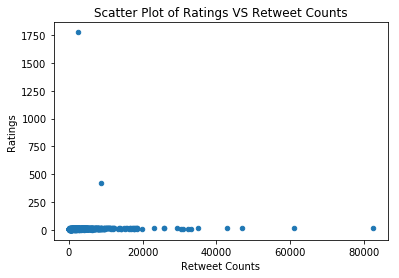

In [130]:
full_twitter_df.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Scatter Plot of Ratings VS Retweet Counts')
fig = plt.gcf()
fig.savefig('Third_Insight_plot.png');

#### Fianlly, i want to declare that i used the follwoing links and helpful resources to complete this project:
#### 1- https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api <br/>
#### 2- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id <br/>
#### 3- Slack Channel for DAND.